In [0]:
# file ↓
# https://drive.google.com/file/d/1Ja8qIUxsG0dPVak0IKL-M1En9vFGO5n5/view?usp=sharing
# show upload dialog
from google.colab import files
uploaded = files.upload()

Saving 007-02.csv to 007-02 (1).csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [0]:
data[:3]

array([[64., 67., 69., 68.],
       [74., 74., 63., 67.],
       [60., 59., 55., 57.]])

In [0]:
data = np.loadtxt('007-02.csv', delimiter=",", skiprows=1)
X = data[:,:3]
y = data[:,3]
m = len(y)


In [0]:
for i in  range(10):
  print("x=[{} {} {}], y={}".format(X[i,0],X[i,1],X[i,2],y[i]))
print("m:",m)

x=[64.0 67.0 69.0], y=68.0
x=[74.0 74.0 63.0], y=67.0
x=[60.0 59.0 55.0], y=57.0
x=[84.0 88.0 89.0], y=91.0
x=[80.0 88.0 78.0], y=82.0
x=[75.0 68.0 68.0], y=63.0
x=[66.0 59.0 55.0], y=65.0
x=[77.0 71.0 66.0], y=73.0
x=[70.0 71.0 60.0], y=67.0
x=[89.0 84.0 80.0], y=85.0
m: 99


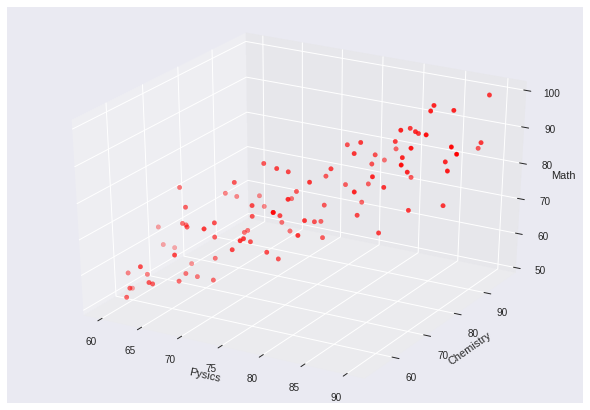

In [0]:
# プロットする
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0],data[:,1],data[:,3],color='red')
ax.set_xlabel('Pysics')
ax.set_ylabel('Chemistry')
ax.set_zlabel('Math')
plt.show()

In [0]:
# Z-Normalization
def norm(X):
  X_norm= np.zeros((X.shape[0], X.shape[1])) # Xの行数=X.shape[0] とXの列数=X.shape[1]をもつ行列を作成し、ゼロ埋めする
  mean = np.zeros((1,X.shape[1]))
  std = np.zeros((1,X.shape[1]))
  for i in range(X.shape[1]): #全列処理を回す
    mean[:,i] = np.mean(X[:,i]) #すべての行のi列目
    std[:,i] = np.std(X[:,i])
    X_norm[:,i] = (X[:,i]-float(mean[:,i]))/float(std[:,i]) 
  return X_norm,mean,std
# X = (X - Xmean)/ Xstd

In [0]:
X_norm, mean, std = norm(X)

In [0]:
X[:5,]

array([[64., 67., 69.],
       [74., 74., 63.],
       [60., 59., 55.],
       [84., 88., 89.],
       [80., 88., 78.]])

In [0]:
X_norm[:5,]

array([[-1.28095057, -0.76202794, -0.45626449],
       [-0.10238081, -0.05223579, -1.002678  ],
       [-1.75237847, -1.57321897, -1.73122936],
       [ 1.07618895,  1.36734852,  1.36511391],
       [ 0.60476105,  1.36734852,  0.36335579]])

In [0]:
print(X_norm.mean(), X_norm.std())

1.4354398702224247e-16 1.0


In [0]:
#モデル式のパラメータ初期値
weight_int = np.zeros((4,1))
print(weight_int)

[[0.]
 [0.]
 [0.]
 [0.]]


In [0]:
#特徴量の前処理
#Wの行列式m*n+1を作成
X_padded = np.column_stack( ( np.ones((m,1)), X_norm ) ) 

In [0]:
X_padded.shape

(99, 4)

In [0]:
X_padded[:10,]

array([[ 1.        , -1.28095057, -0.76202794, -0.45626449],
       [ 1.        , -0.10238081, -0.05223579, -1.002678  ],
       [ 1.        , -1.75237847, -1.57321897, -1.73122936],
       [ 1.        ,  1.07618895,  1.36734852,  1.36511391],
       [ 1.        ,  0.60476105,  1.36734852,  0.36335579],
       [ 1.        ,  0.01547617, -0.66062906, -0.54733341],
       [ 1.        , -1.04523661, -1.57321897, -1.73122936],
       [ 1.        ,  0.25119012, -0.35643242, -0.72947124],
       [ 1.        , -0.57380871, -0.35643242, -1.27588476],
       [ 1.        ,  1.66547383,  0.96175301,  0.54549363]])

In [0]:
#コスト関数
def cost(X,y,weight):
  m=len(y)
  J = 0
  y_hut = X.dot(weight) #np_array1.dot(np_array2)で内積を計算する
  diff = np.power((y_hut - np.transpose([y])),2)
  J = (1.0/(2*m)) * diff.sum(axis=0)
  return J

In [0]:
#コスト関数のテスト
weight_test = np.array([[20],[10],[5],[-1]])
cost(X_padded,y,weight_test)


array([1541.34609465])

In [0]:
#コスト関数2 ... 行列式として計算するバージョン
def cost2(X,y,weight):
  m=len(y)
  J = 0
  y_shaped = y.reshape(len(y),1)
  model = np.dot(X,weight) 
  delta = np.dot((model - y_shaped).T, (model - y_shaped))
  J = (1.0/(2*m)) * delta
  return J

In [0]:
cost2(X_padded,y,weight_test)


array([[1541.34609465]])

In [0]:
#学習率と学習回数の設定
alpha = 0.01
num_iters = 500

In [0]:
#最急降下法
def gradientDescent(X,y,weight,alpha,iterations):
  m = len(y)
  J_history = np.zeros((iterations,1))#コスト関数の履歴（学習用）
  for i in range(iterations):
    weight = weight - alpha *(1.0/m) * np.transpose(X).dot(X.dot(weight)- np.transpose([y]))
    J_history[i] = cost(X,y,weight)
  return weight, J_history
  

In [0]:
weight_int

array([[0.],
       [0.],
       [0.],
       [0.]])

In [0]:
weight, J_history = gradientDescent(X_padded,y,weight_int,alpha,num_iters)

In [0]:
print(weight)

[[74.57745626]
 [ 2.22894853]
 [ 5.45280885]
 [ 3.22092053]]


In [0]:
print(J_history.size)
J_history[0:10]

500


array([[2824.07567345],
       [2766.49260483],
       [2710.14022348],
       [2654.98960376],
       [2601.01262744],
       [2548.18195558],
       [2496.47100152],
       [2445.85390501],
       [2396.30550744],
       [2347.80132813]])

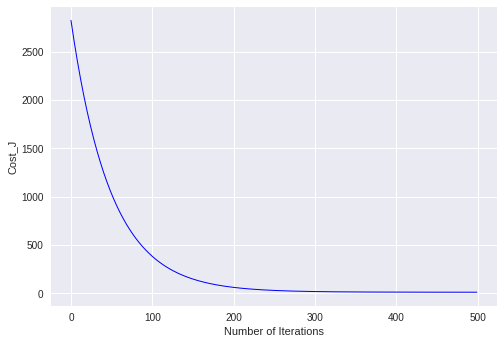

In [0]:
#コストと学習回数のグラフ
plt.plot(range(J_history.size),J_history,"-b",linewidth=1)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost_J')
plt.grid(True)
plt.show()


In [0]:
# テスト　物理76、化学96、統計82
#まず正規化
pysics_norm =(76-float(mean[:,0]))/float(std[:,0])
science_norm =(96-float(mean[:,1]))/float(std[:,1])
statistics_norm =(82-float(mean[:,2]))/float(std[:,2])


In [0]:
#X0 を追加
pred_padded = np.array([1,pysics_norm,science_norm,statistics_norm])
pred_padded

array([1.        , 0.13333314, 2.17853956, 0.72763147])

In [0]:
#モデルを使って予測
pred = pred_padded.dot(weight)

In [0]:
print(pred)

[89.09745188]
